# 2023-02-01

## Initialization

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets
from utils.initialization import sigmoid, relu, compute_loss, forward_propagation, backward_propagation
from utils.initialization import update_parameters, predict, load_dataset, plot_decision_boundary, predict_dec

In [12]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (7.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

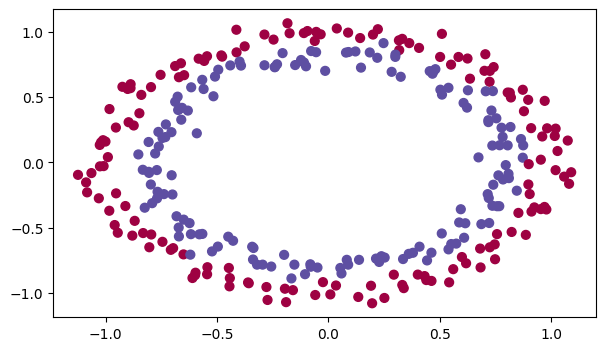

In [13]:
# loading the dataset
train_X, train_Y, test_X, test_Y = load_dataset()

In [16]:
def model(X: np.ndarray, Y: np.ndarray, learning_rate: float = 1e-2, num_iterations: int = 15000, print_cost: bool = True, initialization: str = "he") -> dict:
    grads = {}
    costs = [] # to keep track of the loss
    m = X.shape[1] # number of examples
    layers_dims = [X.shape[0], 10, 5, 1]
    
    # Initialize parameters dictionary.
    if initialization == "zeros":
        parameters = initialize_parameters_zeros(layers_dims)
    elif initialization == "random":
        parameters = initialize_parameters_random(layers_dims)
    elif initialization == "he":
        parameters = initialize_parameters_he(layers_dims)

    # Loop (gradient descent)

    for i in range(0, num_iterations):

        # Forward propagation: LINEAR -> RELU -> LINEAR -> RELU -> LINEAR -> SIGMOID.
        a3, cache = forward_propagation(X, parameters)
        
        # Loss
        cost = compute_loss(a3, Y)

        # Backward propagation.
        grads = backward_propagation(X, Y, cache)
        
        # Update parameters.
        parameters = update_parameters(parameters, grads, learning_rate)
        
        # Print the loss every 1000 iterations
        if print_cost and i % 1000 == 0:
            print("Cost after iteration {}: {}".format(i, cost))
            costs.append(cost)
            
    # plot the loss
    plt.plot(costs)
    plt.ylabel('cost')
    plt.xlabel('iterations (per hundreds)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters

In [56]:

def initialize_parameters_zeros(layers_dims: list) -> dict:
    parameters = {}
    L = len(layers_dims) # number of layers in the network

    for l in range(1, L):
        parameters['W' + str(l)] = (np.zeros((layers_dims[l], layers_dims[l - 1])))
        parameters['b' + str(l)] = (np.zeros((layers_dims[l], 1)))

    return parameters

In [57]:
parameters = initialize_parameters_zeros([3,2,1])
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[0. 0. 0.]
 [0. 0. 0.]]
b1 = [[0.]
 [0.]]
W2 = [[0. 0.]]
b2 = [[0.]]


Cost after iteration 0: 0.6931471805599453
Cost after iteration 1000: 0.6931471805599453
Cost after iteration 2000: 0.6931471805599453
Cost after iteration 3000: 0.6931471805599453
Cost after iteration 4000: 0.6931471805599453
Cost after iteration 5000: 0.6931471805599453
Cost after iteration 6000: 0.6931471805599453
Cost after iteration 7000: 0.6931471805599453
Cost after iteration 8000: 0.6931471805599453
Cost after iteration 9000: 0.6931471805599453
Cost after iteration 10000: 0.6931471805599453
Cost after iteration 11000: 0.6931471805599453
Cost after iteration 12000: 0.6931471805599453
Cost after iteration 13000: 0.6931471805599453
Cost after iteration 14000: 0.6931471805599453


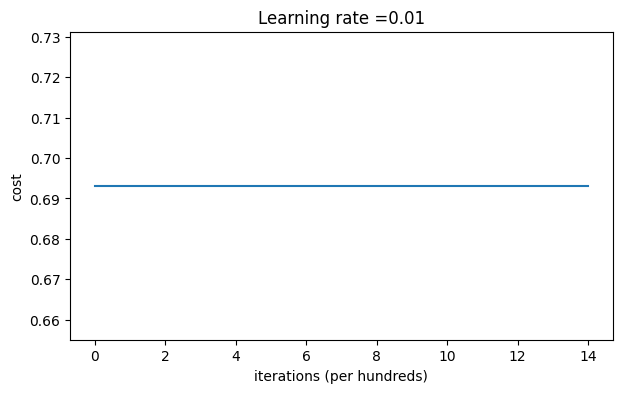

On the train set:
Accuracy: 0.5
On the test set:
Accuracy: 0.5


In [58]:
parameters = model(train_X, train_Y, initialization = "zeros")
print ("On the train set:")
predictions_train = predict(train_X, train_Y, parameters)
print ("On the test set:")
predictions_test = predict(test_X, test_Y, parameters)

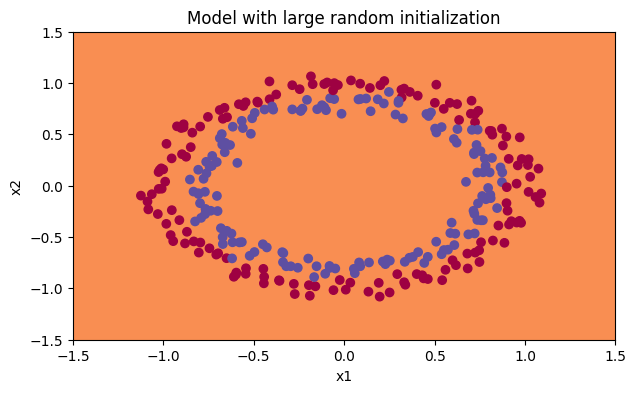

In [59]:
plt.title("Model with large random initialization")
axes = plt.gca()
axes.set_xlim([-1.5,1.5])
axes.set_ylim([-1.5,1.5])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)

In [60]:
print ("predictions_train = " + str(predictions_train))
print ("predictions_test = " + str(predictions_test))

predictions_train = [[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0]]
predictions_test = [[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]


In [96]:
def initialize_parameters_random(layers_dims: list) -> dict:
    np.random.seed(3)               # This seed makes sure your "random" numbers will be the as ours
    parameters = {}
    L = len(layers_dims)            # integer representing the number of layers

    for l in range(1, L):
        parameters['W' + str(l)] = (np.random.randn(layers_dims[l], layers_dims[l - 1]) * 10)
        parameters['b' + str(l)] = (np.zeros((layers_dims[l], 1)))

    return parameters

In [97]:
parameters = initialize_parameters_random([3, 2, 1])
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[ 17.88628473   4.36509851   0.96497468]
 [-18.63492703  -2.77388203  -3.54758979]]
b1 = [[0.]
 [0.]]
W2 = [[-0.82741481 -6.27000677]]
b2 = [[0.]]


/Users/dqmis/github/code_academy_ai_course/class_materials/examples/deep_learning/utils/initialization.py:160: RuntimeWarning: divide by zero encountered in log
  logprobs = np.multiply(-np.log(a3), Y) + np.multiply(-np.log(1 - a3), 1 - Y)
/Users/dqmis/github/code_academy_ai_course/class_materials/examples/deep_learning/utils/initialization.py:160: RuntimeWarning: invalid value encountered in multiply
  logprobs = np.multiply(-np.log(a3), Y) + np.multiply(-np.log(1 - a3), 1 - Y)


Cost after iteration 0: inf
Cost after iteration 1000: 0.6243608083761976
Cost after iteration 2000: 0.5979255420418802
Cost after iteration 3000: 0.5636974033624995
Cost after iteration 4000: 0.550129435783533
Cost after iteration 5000: 0.5444127596753244
Cost after iteration 6000: 0.5374134745412525
Cost after iteration 7000: 0.4738098425592898
Cost after iteration 8000: 0.3977585829307016
Cost after iteration 9000: 0.3934706020369666
Cost after iteration 10000: 0.39202176138493355
Cost after iteration 11000: 0.3892161604894328
Cost after iteration 12000: 0.3861393388253537
Cost after iteration 13000: 0.3849794626808294
Cost after iteration 14000: 0.38278262086755843


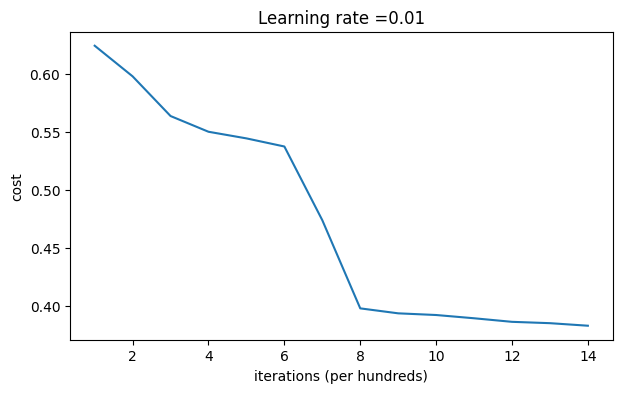

On the train set:
Accuracy: 0.83
On the test set:
Accuracy: 0.86


In [98]:
parameters = model(train_X, train_Y, initialization = "random")
print ("On the train set:")
predictions_train = predict(train_X, train_Y, parameters)
print ("On the test set:")
predictions_test = predict(test_X, test_Y, parameters)

In [99]:
print (predictions_train)
print (predictions_test)

[[1 0 1 1 0 0 1 1 1 1 1 0 1 0 0 1 0 1 1 0 0 0 1 0 1 1 1 1 1 1 0 1 1 0 0 1
  1 1 1 1 1 1 1 0 1 1 1 1 0 1 0 1 1 1 1 0 0 1 1 1 1 0 1 1 0 1 0 1 1 1 1 0
  0 0 0 0 1 0 1 0 1 1 1 0 0 1 1 1 1 1 1 0 0 1 1 1 0 1 1 0 1 0 1 1 0 1 1 0
  1 0 1 1 0 0 1 0 0 1 1 0 1 1 1 0 1 0 0 1 0 1 1 1 1 1 1 1 0 1 1 0 0 1 1 0
  0 0 1 0 1 0 1 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 0 1 1 0 1 0 1 1 1 1 0 1 1 1
  1 0 1 0 1 0 1 1 1 1 0 1 1 0 1 1 0 1 1 0 1 0 1 1 1 0 1 1 1 0 1 0 1 0 0 1
  0 1 1 0 1 1 0 1 1 0 1 1 1 0 1 1 1 1 0 1 0 0 1 1 0 1 1 1 0 0 0 1 1 0 1 1
  1 1 0 1 1 0 1 1 1 0 0 1 0 0 0 1 0 0 0 1 1 1 1 0 0 0 0 1 1 1 1 0 0 1 1 1
  1 1 1 1 0 0 0 1 1 1 1 0]]
[[1 1 1 1 0 1 0 1 1 0 1 1 1 0 0 0 0 1 0 1 0 0 1 0 1 0 1 1 1 1 1 0 0 0 0 1
  0 1 1 0 0 1 1 1 1 1 0 1 1 1 0 1 0 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 0
  1 1 1 1 1 0 1 0 0 1 0 0 0 1 1 0 1 1 0 0 0 1 1 0 1 1 0 0]]


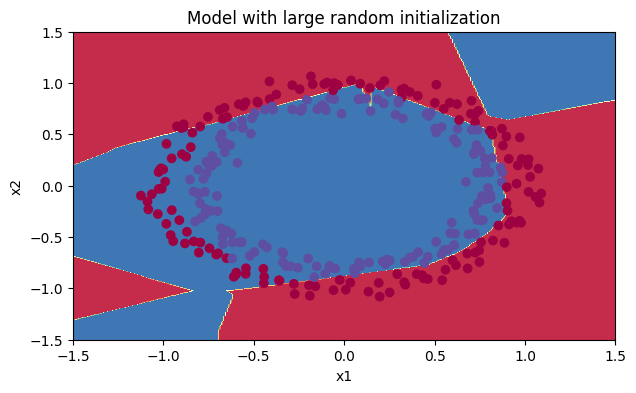

In [100]:
plt.title("Model with large random initialization")
axes = plt.gca()
axes.set_xlim([-1.5,1.5])
axes.set_ylim([-1.5,1.5])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)

Cost after iteration 0: inf
Cost after iteration 1000: 0.6243608083761976
Cost after iteration 2000: 0.5979255420418802
Cost after iteration 3000: 0.5636974033624995
Cost after iteration 4000: 0.550129435783533
Cost after iteration 5000: 0.5444127596753244
Cost after iteration 6000: 0.5374134745412525
Cost after iteration 7000: 0.4738098425592898
Cost after iteration 8000: 0.3977585829307016
Cost after iteration 9000: 0.3934706020369666
Cost after iteration 10000: 0.39202176138493355
Cost after iteration 11000: 0.3892161604894328
Cost after iteration 12000: 0.3861393388253537
Cost after iteration 13000: 0.3849794626808294
Cost after iteration 14000: 0.38278262086755843
Cost after iteration 15000: 0.38106528976214993
Cost after iteration 16000: 0.37995793894667557
Cost after iteration 17000: 0.3791323763058783
Cost after iteration 18000: 0.37453285724289304
Cost after iteration 19000: 0.3716403493766787
Cost after iteration 20000: 0.3697966335911174
Cost after iteration 21000: 0.3631042

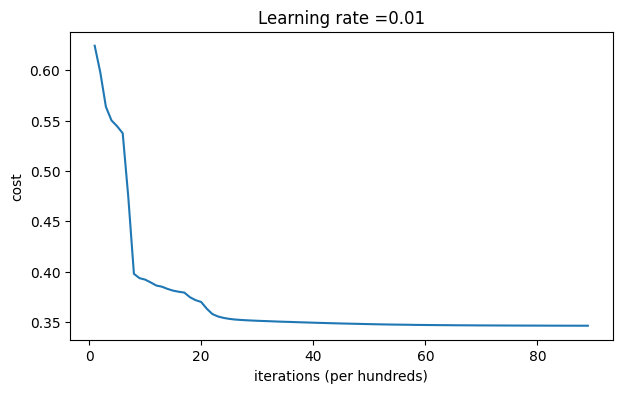

On the train set:
Accuracy: 0.8533333333333334
On the test set:
Accuracy: 0.84


In [68]:
parameters = model(train_X, train_Y, initialization = "random", num_iterations=90000)
print ("On the train set:")
predictions_train = predict(train_X, train_Y, parameters)
print ("On the test set:")
predictions_test = predict(test_X, test_Y, parameters)

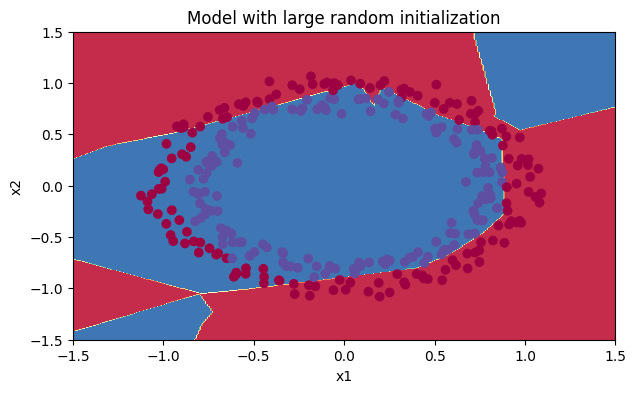

In [69]:
plt.title("Model with large random initialization")
axes = plt.gca()
axes.set_xlim([-1.5,1.5])
axes.set_ylim([-1.5,1.5])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)

In [74]:
def initialize_parameters_random(layers_dims: list) -> dict:
    np.random.seed(3)               # This seed makes sure your "random" numbers will be the as ours
    parameters = {}
    L = len(layers_dims)            # integer representing the number of layers

    for l in range(1, L):
        #parameters['W' + str(l)] = (np.random.uniform(low=-1, high=1, size=(layers_dims[l], layers_dims[l - 1])))
        parameters['W' + str(l)] = (np.random.randn(layers_dims[l], layers_dims[l - 1]))
        parameters['b' + str(l)] = (np.zeros((layers_dims[l], 1)))

    return parameters

In [75]:
parameters = initialize_parameters_random([3, 2, 1])
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[ 1.78862847  0.43650985  0.09649747]
 [-1.8634927  -0.2773882  -0.35475898]]
b1 = [[0.]
 [0.]]
W2 = [[-0.08274148 -0.62700068]]
b2 = [[0.]]


Cost after iteration 0: 1.9698193182646349
Cost after iteration 1000: 0.6894749458317238
Cost after iteration 2000: 0.675058063210226
Cost after iteration 3000: 0.6469210868251526
Cost after iteration 4000: 0.5398790761260323
Cost after iteration 5000: 0.40626422697648484
Cost after iteration 6000: 0.29844708868759445
Cost after iteration 7000: 0.22183734662094842
Cost after iteration 8000: 0.16926424179038066
Cost after iteration 9000: 0.13413308969827084
Cost after iteration 10000: 0.10873865543082414
Cost after iteration 11000: 0.0916944306812697
Cost after iteration 12000: 0.07991173603998078
Cost after iteration 13000: 0.07083949901112584
Cost after iteration 14000: 0.0637020902258052


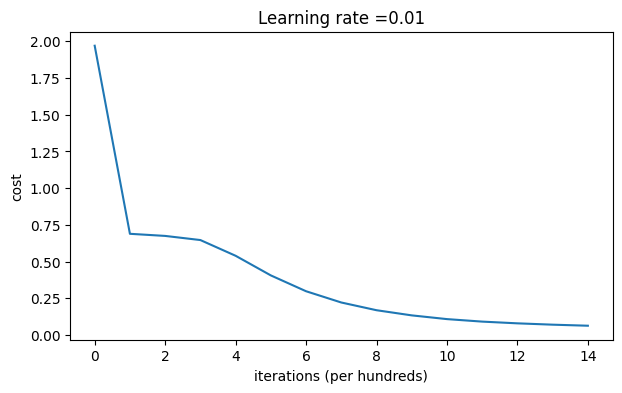

On the train set:
Accuracy: 0.9966666666666667
On the test set:
Accuracy: 0.96


In [76]:
parameters = model(train_X, train_Y, initialization = "random")
print ("On the train set:")
predictions_train = predict(train_X, train_Y, parameters)
print ("On the test set:")
predictions_test = predict(test_X, test_Y, parameters)

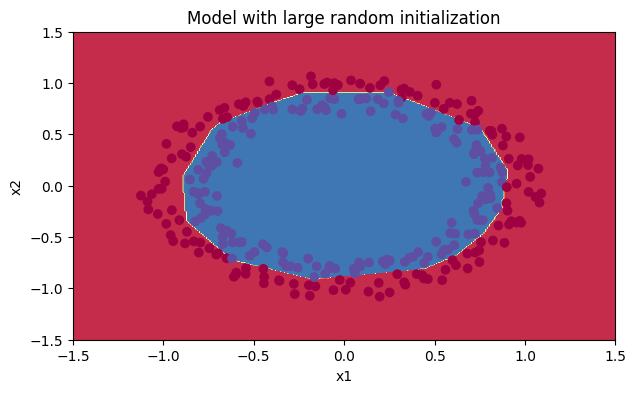

In [77]:
plt.title("Model with large random initialization")
axes = plt.gca()
axes.set_xlim([-1.5,1.5])
axes.set_ylim([-1.5,1.5])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)

In [91]:
# havier initialization
# sqrt(1./layers_dims[l-1])

# he initialization
# sqrt(2./layers_dims[l-1])

def initialize_parameters_he(layers_dims: list) -> dict:
    np.random.seed(3)
    parameters = {}
    L = len(layers_dims)

    for l in range(1, L):
        parameters['W' + str(l)] = (np.random.randn(layers_dims[l], layers_dims[l - 1]) * np.sqrt(2./layers_dims[l-1]))
        parameters['b' + str(l)] = (np.zeros((layers_dims[l], 1)))

    return parameters


In [92]:
parameters = initialize_parameters_he([2, 4, 1])
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[ 1.78862847  0.43650985]
 [ 0.09649747 -1.8634927 ]
 [-0.2773882  -0.35475898]
 [-0.08274148 -0.62700068]]
b1 = [[0.]
 [0.]
 [0.]
 [0.]]
W2 = [[-0.03098412 -0.33744411 -0.92904268  0.62552248]]
b2 = [[0.]]


Cost after iteration 0: 0.8830537463419761
Cost after iteration 1000: 0.6879825919728063
Cost after iteration 2000: 0.6751286264523371
Cost after iteration 3000: 0.6526117768893807
Cost after iteration 4000: 0.6082958970572937
Cost after iteration 5000: 0.5304944491717495
Cost after iteration 6000: 0.41386458170717944
Cost after iteration 7000: 0.31178034648444414
Cost after iteration 8000: 0.23696215330322556
Cost after iteration 9000: 0.18597287209206836
Cost after iteration 10000: 0.15015556280371808
Cost after iteration 11000: 0.12325079292273551
Cost after iteration 12000: 0.09917746546525931
Cost after iteration 13000: 0.08457055954024283
Cost after iteration 14000: 0.07357895962677367


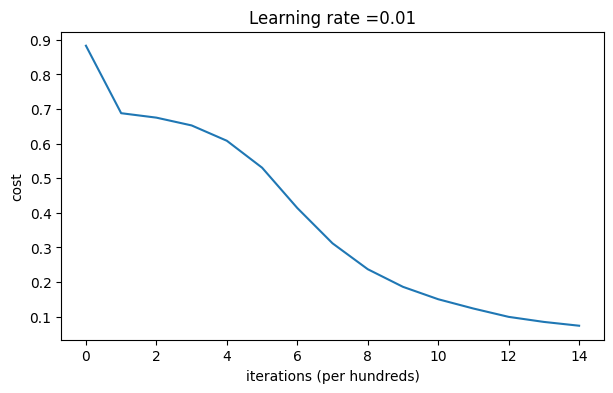

On the train set:
Accuracy: 0.9933333333333333
On the test set:
Accuracy: 0.96


In [93]:
parameters = model(train_X, train_Y, initialization = "he")
print ("On the train set:")
predictions_train = predict(train_X, train_Y, parameters)
print ("On the test set:")
predictions_test = predict(test_X, test_Y, parameters)

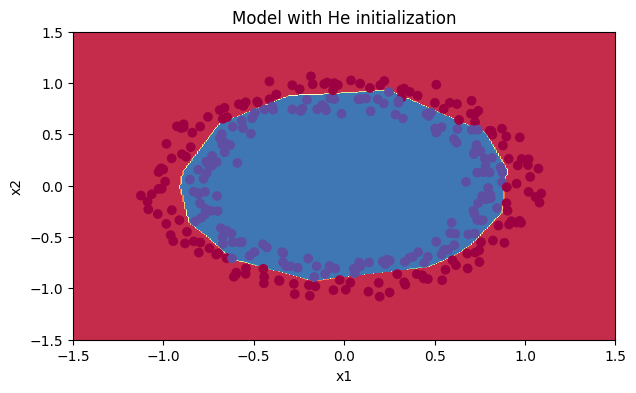

In [94]:


plt.title("Model with He initialization")
axes = plt.gca()
axes.set_xlim([-1.5,1.5])
axes.set_ylim([-1.5,1.5])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)

## Regularization

In [1]:
# import packages
import numpy as np
import matplotlib.pyplot as plt
from utils.regularization import sigmoid, relu, plot_decision_boundary, initialize_parameters, load_2D_dataset, predict_dec
from utils.regularization import compute_cost, predict, forward_propagation, backward_propagation, update_parameters
import sklearn
import sklearn.datasets
import scipy.io

%matplotlib inline
plt.rcParams['figure.figsize'] = (7.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

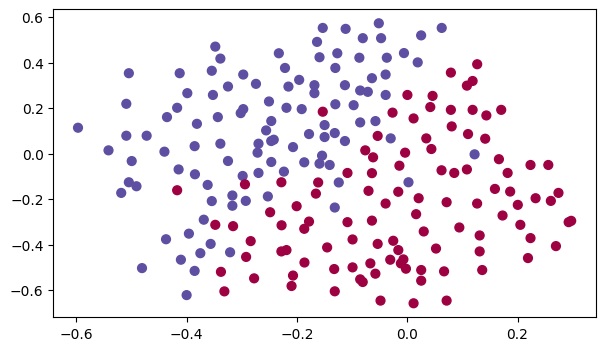

In [2]:
train_X, train_Y, test_X, test_Y = load_2D_dataset("./datasets/regularization.mat")

In [3]:
def model(X, Y, learning_rate = 0.3, num_iterations = 30000, print_cost = True, lambd = 0, keep_prob = 1):
    """
    Implements a three-layer neural network: LINEAR->RELU->LINEAR->RELU->LINEAR->SIGMOID.
    
    Arguments:
    X -- input data, of shape (input size, number of examples)
    Y -- true "label" vector (1 for blue dot / 0 for red dot), of shape (output size, number of examples)
    learning_rate -- learning rate of the optimization
    num_iterations -- number of iterations of the optimization loop
    print_cost -- If True, print the cost every 10000 iterations
    lambd -- regularization hyperparameter, scalar
    keep_prob - probability of keeping a neuron active during drop-out, scalar.
    
    Returns:
    parameters -- parameters learned by the model. They can then be used to predict.
    """
        
    grads = {}
    l2 = None
    costs = []                            # to keep track of the cost
    m = X.shape[1]                        # number of examples
    layers_dims = [X.shape[0], 20, 3, 1]
    
    # Initialize parameters dictionary.
    parameters = initialize_parameters(layers_dims)

    # Loop (gradient descent)

    for i in range(0, num_iterations):

        # Forward propagation: LINEAR -> RELU -> LINEAR -> RELU -> LINEAR -> SIGMOID.
        if keep_prob == 1:
            a3, cache = forward_propagation(X, parameters)
        elif keep_prob < 1:
            a3, cache = forward_propagation_with_dropout(X, parameters, keep_prob)
        
        # Cost function
        if lambd == 0:
            cost = compute_cost(a3, Y)
        else:
            cost, l2 = compute_cost_with_regularization(a3, Y, parameters, lambd)
            
        # Backward propagation.
        assert(lambd==0 or keep_prob==1)    # it is possible to use both L2 regularization and dropout, 
                                            # but this assignment will only explore one at a time
        if lambd == 0 and keep_prob == 1:
            grads = backward_propagation(X, Y, cache)
        elif lambd != 0:
            grads = backward_propagation_with_regularization(X, Y, cache, lambd)
        elif keep_prob < 1:
            grads = backward_propagation_with_dropout(X, Y, cache, keep_prob)
        
        # Update parameters.
        parameters = update_parameters(parameters, grads, learning_rate)
        
        # Print the loss every 10000 iterations
        if print_cost and i % 10000 == 0:
            if l2:
                print("L2 cost {}: {}".format(i, l2))
            print("Cost after iteration {}: {}".format(i, cost))
        if print_cost and i % 1000 == 0:
            costs.append(cost)
    
    # plot the cost
    plt.plot(costs)
    plt.ylabel('cost')
    plt.xlabel('iterations (x1,000)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters

Cost after iteration 0: 0.687249556933969
Cost after iteration 10000: 0.169979928828798
Cost after iteration 20000: 0.14352137607631935


/Users/dqmis/github/code_academy_ai_course/class_materials/examples/deep_learning/utils/regularization.py:299: RuntimeWarning: divide by zero encountered in log
  logprobs = np.multiply(-np.log(a3), Y) + np.multiply(-np.log(1 - a3), 1 - Y)
/Users/dqmis/github/code_academy_ai_course/class_materials/examples/deep_learning/utils/regularization.py:299: RuntimeWarning: invalid value encountered in multiply
  logprobs = np.multiply(-np.log(a3), Y) + np.multiply(-np.log(1 - a3), 1 - Y)


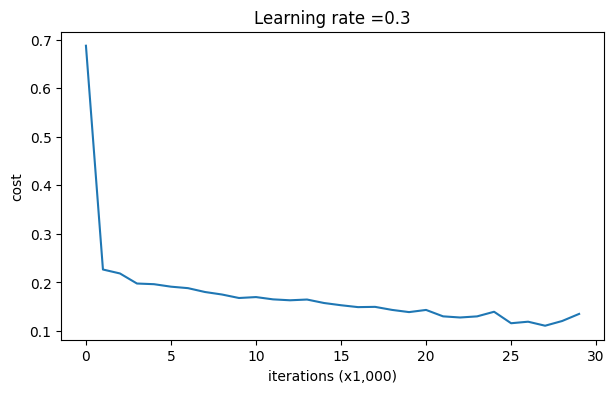

On the training set:
Accuracy: 0.9478672985781991
On the test set:
Accuracy: 0.94


In [4]:

parameters = model(train_X, train_Y)
print ("On the training set:")
predictions_train = predict(train_X, train_Y, parameters)
print ("On the test set:")
predictions_test = predict(test_X, test_Y, parameters)

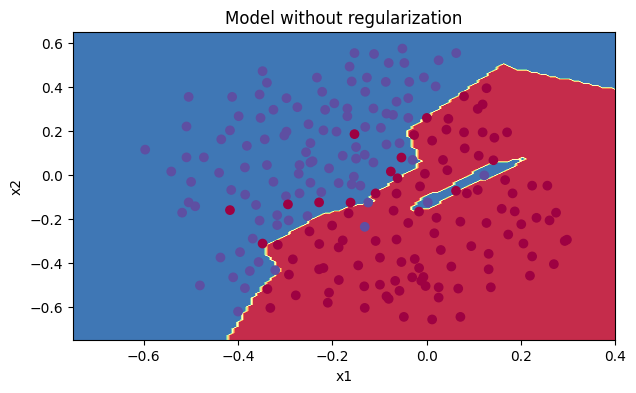

In [5]:
plt.title("Model without regularization")
axes = plt.gca()
axes.set_xlim([-0.75,0.40])
axes.set_ylim([-0.75,0.65])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)

### L2 Reg
$$J = - \frac{1}{m} \sum\limits_{i = 1}^{m} \large{(}\small  y^{(i)}\log\left(a^{[L](i)}\right) + (1-y^{(i)})\log\left(1- a^{[L](i)}\right) \large{)} \tag{1}$$

$$J_{regularized} = \small \underbrace{-\frac{1}{m} \sum\limits_{i = 1}^{m} \large{(}\small y^{(i)}\log\left(a^{[L](i)}\right) + (1-y^{(i)})\log\left(1- a^{[L](i)}\right) \large{)} }_\text{cross-entropy cost} + \underbrace{\frac{1}{m} \frac{\lambda}{2} \sum\limits_l\sum\limits_k\sum\limits_j W_{k,j}^{[l]2} }_\text{L2 regularization cost} \tag{2}$$

In [6]:
parameters

{'W1': array([[-0.6853496 ,  0.18120035],
        [-1.44447567,  7.41566264],
        [-1.01860999,  0.36775381],
        [ 0.50132496, -0.05957588],
        [ 7.21060655, -2.19077411],
        [ 5.13537165, -0.57628445],
        [-2.76907455,  0.07956266],
        [ 4.12368137, -2.34373913],
        [ 3.13608916,  2.08725032],
        [ 2.566651  ,  5.84753617],
        [-0.96932805,  0.31552097],
        [ 2.37451731,  1.61252016],
        [ 0.95824181,  4.96826533],
        [-5.09699961,  1.61081922],
        [ 6.89000936, -7.10928728],
        [-0.88238344,  6.40074778],
        [ 0.59410002,  0.09321338],
        [ 2.8370589 , -2.04906333],
        [-0.11822307, -4.08689553],
        [ 5.65207288,  0.9726268 ]]),
 'b1': array([[-0.00965207],
        [ 0.58235244],
        [-0.00537019],
        [ 0.17198228],
        [-0.05402756],
        [ 1.78260028],
        [-0.61061992],
        [ 0.68604897],
        [ 1.74125693],
        [ 0.97163074],
        [-0.00457969],
        [ 1.3

In [7]:
def compute_cost_with_regularization(A3, Y, parameters, lambd):
    """
    Implement the cost function with L2 regularization. See formula (2) above.
    
    Arguments:
    A3 -- post-activation, output of forward propagation, of shape (output size, number of examples)
    Y -- "true" labels vector, of shape (output size, number of examples)
    parameters -- python dictionary containing parameters of the model
    
    Returns:
    cost - value of the regularized loss function (formula (2))
    """
    
    m = Y.shape[1]
    W1 = parameters["W1"]
    W2 = parameters["W2"]
    W3 = parameters["W3"]
    
    cross_entropy_cost = compute_cost(A3, Y) # This gives you the cross-entropy part of the cost
    
    L2_regularization_cost = (1./m) * (lambd/2) * (np.sum(np.square(W1)) + np.sum(np.square(W2)) + np.sum(np.square(W3)))

    cost = cross_entropy_cost + L2_regularization_cost
    
    return cost, L2_regularization_cost

In [8]:
def backward_propagation_with_regularization(X, Y, cache, lambd):
    """
    Implements the backward propagation of our baseline model to which we added an L2 regularization.
    
    Arguments:
    X -- input dataset, of shape (input size, number of examples)
    Y -- "true" labels vector, of shape (output size, number of examples)
    cache -- cache output from forward_propagation()
    lambd -- regularization hyperparameter, scalar
    
    Returns:
    gradients -- A dictionary with the gradients with respect to each parameter, activation and pre-activation variables
    """
    
    m = X.shape[1]
    (Z1, A1, W1, b1, Z2, A2, W2, b2, Z3, A3, W3, b3) = cache
    
    dZ3 = A3 - Y
    
    ### START CODE HERE ### (approx. 1 line)
    dW3 = 1./m * np.dot(dZ3, A2.T) + (lambd/m)*W3
    ### END CODE HERE ###
    db3 = 1./m * np.sum(dZ3, axis=1, keepdims = True)
    
    dA2 = np.dot(W3.T, dZ3)
    dZ2 = np.multiply(dA2, np.int64(A2 > 0))
    ### START CODE HERE ### (approx. 1 line)
    dW2 = 1./m * np.dot(dZ2, A1.T) + (lambd/m)*W2
    ### END CODE HERE ###
    db2 = 1./m * np.sum(dZ2, axis=1, keepdims = True)
    
    dA1 = np.dot(W2.T, dZ2)
    dZ1 = np.multiply(dA1, np.int64(A1 > 0))
    ### START CODE HERE ### (approx. 1 line)
    dW1 = 1./m * np.dot(dZ1, X.T) + (lambd/m)*W1
    ### END CODE HERE ###
    db1 = 1./m * np.sum(dZ1, axis=1, keepdims = True)
    
    gradients = {"dZ3": dZ3, "dW3": dW3, "db3": db3,"dA2": dA2,
                 "dZ2": dZ2, "dW2": dW2, "db2": db2, "dA1": dA1, 
                 "dZ1": dZ1, "dW1": dW1, "db1": db1}
    
    return gradients

L2 cost 0: 0.030963808917088286
Cost after iteration 0: 0.7117812238021423
L2 cost 10000: 0.04928989710652424
Cost after iteration 10000: 0.26906708271297086
L2 cost 20000: 0.051176922737457595
Cost after iteration 20000: 0.2688069004163204


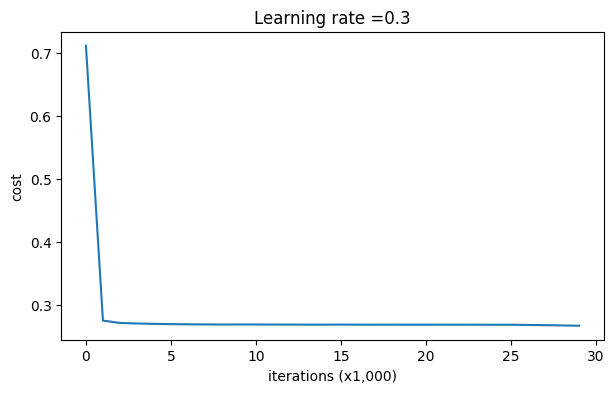

On the train set:
Accuracy: 0.9383886255924171
On the test set:
Accuracy: 0.94


In [9]:
parameters = model(train_X, train_Y, lambd = 0.7)
print ("On the train set:")
predictions_train = predict(train_X, train_Y, parameters)
print ("On the test set:")
predictions_test = predict(test_X, test_Y, parameters)

In [10]:
parameters

{'W1': array([[-8.63420409e-02,  7.56851272e-02],
        [ 3.74811390e-14, -1.90095920e-14],
        [-4.04068642e-01,  3.54547854e-01],
        [ 9.20627035e-01,  2.14620230e-01],
        [ 8.12974163e-01,  1.89566198e-01],
        [-8.36341937e-06, -5.53559095e-05],
        [-2.85764717e-01,  2.50393653e-01],
        [-3.58016121e-14,  4.46327171e-14],
        [-4.08353857e-01,  3.59258687e-01],
        [-2.24464807e-01,  1.97547132e-01],
        [ 1.18781335e-01, -1.06123946e-01],
        [-4.04772927e-02,  1.92160333e-01],
        [-8.72543387e-01, -6.43075333e-01],
        [-2.98652166e-01,  2.62553549e-01],
        [ 2.00823242e+00, -7.54405997e-01],
        [-3.31607746e-01,  6.64055119e-01],
        [-4.42961793e-02,  3.88655960e-02],
        [-4.27252215e-01,  3.75932657e-01],
        [-3.79407264e-01,  7.59766229e-01],
        [-4.44867460e-01,  3.91229113e-01]]),
 'b1': array([[ 9.31885813e-02],
        [-3.44443428e-02],
        [ 2.53362916e-01],
        [ 1.40018597e-01]

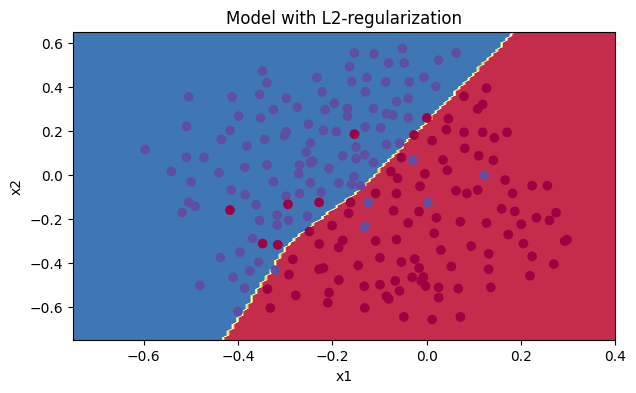

In [11]:
plt.title("Model with L2-regularization")
axes = plt.gca()
axes.set_xlim([-0.75,0.40])
axes.set_ylim([-0.75,0.65])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)

L2 cost 0: 0.06052609040259705
Cost after iteration 0: 0.7529379330696011
L2 cost 10000: 0.05165051086959129
Cost after iteration 10000: 0.28416157321550606
L2 cost 20000: 0.05130971960008051
Cost after iteration 20000: 0.2841292653356655


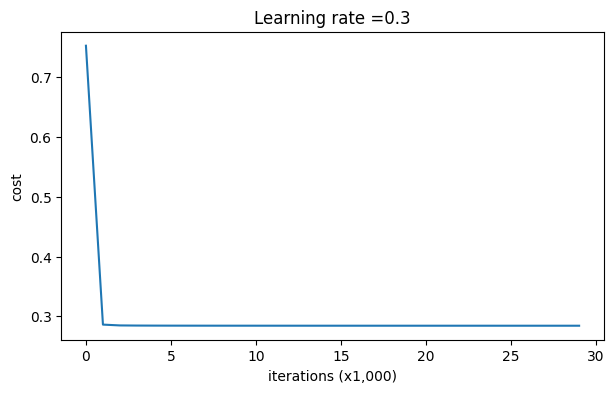

On the train set:
Accuracy: 0.9289099526066351
On the test set:
Accuracy: 0.935


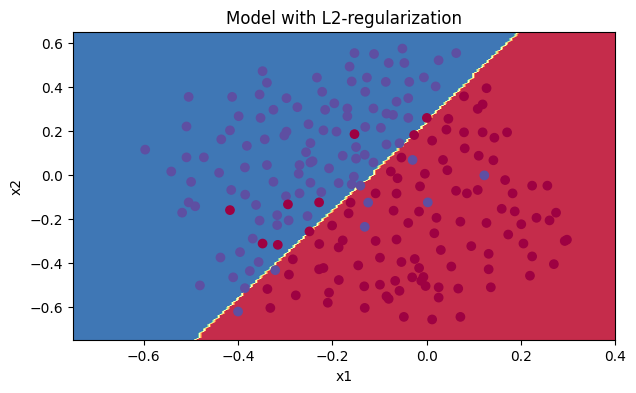

In [12]:
parameters = model(train_X, train_Y, lambd = 0.9)
print ("On the train set:")
predictions_train = predict(train_X, train_Y, parameters)
print ("On the test set:")
predictions_test = predict(test_X, test_Y, parameters)

plt.title("Model with L2-regularization")
axes = plt.gca()
axes.set_xlim([-0.75,0.40])
axes.set_ylim([-0.75,0.65])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)

L2 cost 0: 0.18342443455750018
Cost after iteration 0: 0.8527903175857812
L2 cost 10000: 0.11909623027752957
Cost after iteration 10000: 0.3713333722472077
L2 cost 20000: 0.11900358999143848
Cost after iteration 20000: 0.37129200687414843


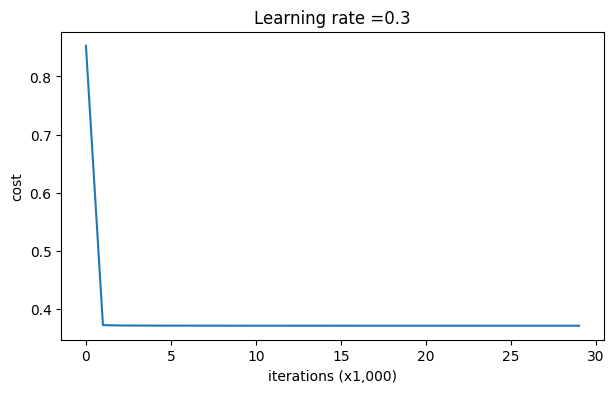

On the train set:
Accuracy: 0.9146919431279621
On the test set:
Accuracy: 0.925


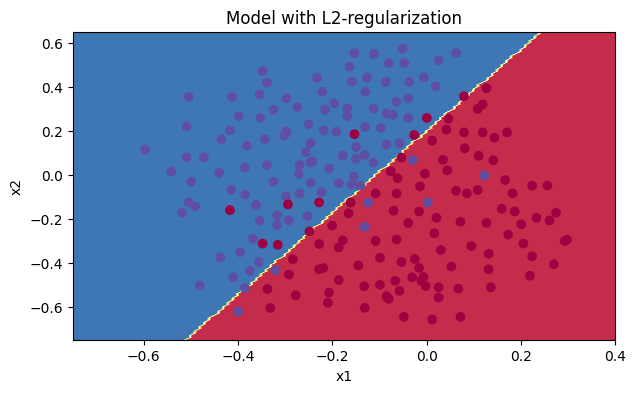

In [13]:
parameters = model(train_X, train_Y, lambd = 3.0)
print ("On the train set:")
predictions_train = predict(train_X, train_Y, parameters)
print ("On the test set:")
predictions_test = predict(test_X, test_Y, parameters)

plt.title("Model with L2-regularization")
axes = plt.gca()
axes.set_xlim([-0.75,0.40])
axes.set_ylim([-0.75,0.65])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)

L2 cost 0: 0.6356102254069224
Cost after iteration 0: 1.3303303681507586
L2 cost 10000: 1.0964843802576415e-34
Cost after iteration 10000: 0.6931359498627058
L2 cost 20000: 1.1164769365993717e-34
Cost after iteration 20000: 0.6931359498627058


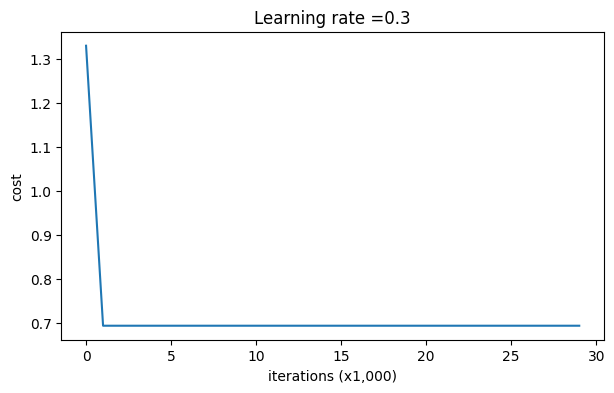

On the train set:
Accuracy: 0.5023696682464455
On the test set:
Accuracy: 0.435


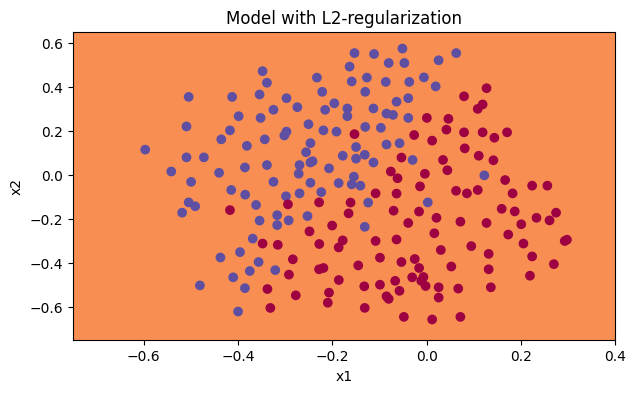

In [14]:
parameters = model(train_X, train_Y, lambd = 10.0)
print ("On the train set:")
predictions_train = predict(train_X, train_Y, parameters)
print ("On the test set:")
predictions_test = predict(test_X, test_Y, parameters)

plt.title("Model with L2-regularization")
axes = plt.gca()
axes.set_xlim([-0.75,0.40])
axes.set_ylim([-0.75,0.65])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)

L2 cost 0: 4.426217877018453
Cost after iteration 0: 5.118628436774568
L2 cost 10000: 1.6339345653272481e-37
Cost after iteration 10000: 0.6931359498627058
L2 cost 20000: 1.936878645667797e-37
Cost after iteration 20000: 0.6931359498627058


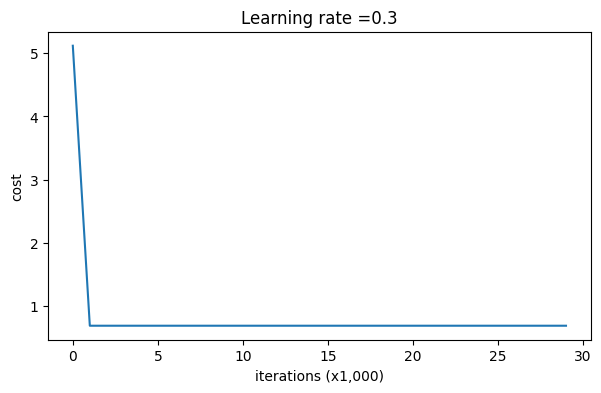

On the train set:
Accuracy: 0.5023696682464455
On the test set:
Accuracy: 0.435


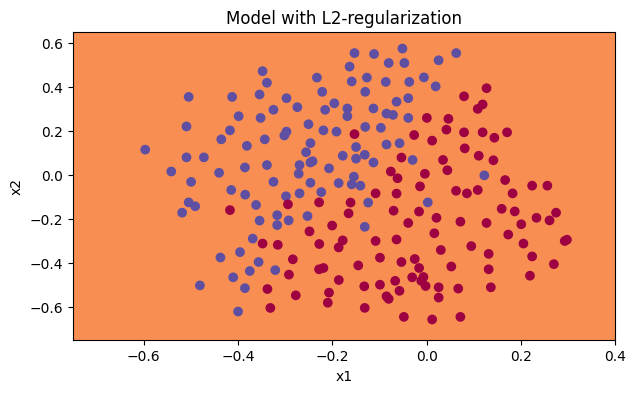

In [15]:
parameters = model(train_X, train_Y, lambd = 100.0)
print ("On the train set:")
predictions_train = predict(train_X, train_Y, parameters)
print ("On the test set:")
predictions_test = predict(test_X, test_Y, parameters)

plt.title("Model with L2-regularization")
axes = plt.gca()
axes.set_xlim([-0.75,0.40])
axes.set_ylim([-0.75,0.65])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)

In [16]:
parameters

{'W1': array([[-8.14361881e-056,  1.12027314e-055],
        [ 1.48219694e-323, -1.48219694e-323],
        [-1.48219694e-323,  1.48219694e-323],
        [-3.76511613e-055,  5.17946453e-055],
        [ 1.48219694e-323, -1.48219694e-323],
        [-1.35163533e-056,  1.85937088e-056],
        [-9.68886292e-058,  1.33284393e-057],
        [ 1.48219694e-323,  1.48219694e-323],
        [ 1.48219694e-323,  1.48219694e-323],
        [-5.47233914e-056,  7.52799795e-056],
        [-7.95844111e-057,  1.09479926e-056],
        [-4.86061067e-055,  6.68647653e-055],
        [-1.48219694e-323,  1.48219694e-323],
        [-4.17323544e-056,  5.74089198e-056],
        [-1.48219694e-323,  1.48219694e-323],
        [ 1.48219694e-323,  1.48219694e-323],
        [-1.79857190e-055,  2.47419709e-055],
        [ 1.48219694e-323,  1.48219694e-323],
        [ 1.48219694e-323, -1.48219694e-323],
        [ 1.48219694e-323, -1.48219694e-323]]),
 'b1': array([[ 1.38361011e-02],
        [-2.91281764e-02],
        [-9.

L2 cost 0: 6.459354371984961e-07
Cost after iteration 0: 0.6713283318514338
L2 cost 10000: 4.86045003961819e-06
Cost after iteration 10000: 0.1502872624476183
L2 cost 20000: 1.1543722476961282e-05
Cost after iteration 20000: 0.09532013629905682


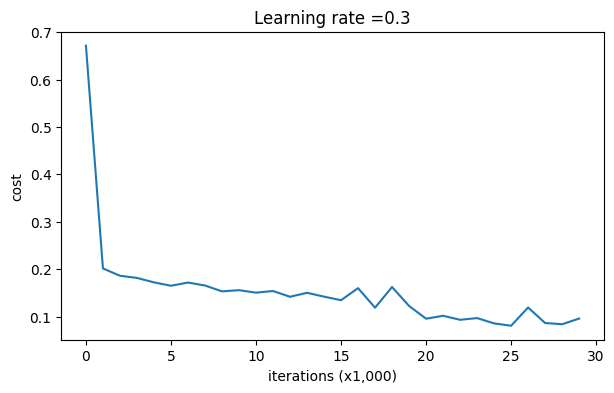

On the train set:
Accuracy: 0.9289099526066351
On the test set:
Accuracy: 0.915


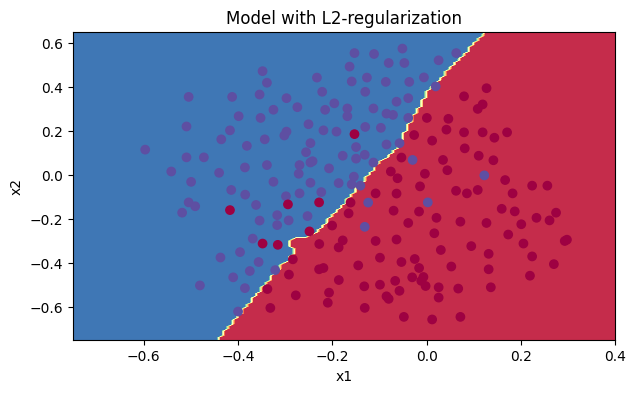

In [17]:
parameters = model(train_X, train_Y, lambd = 1e-5)
print ("On the train set:")
predictions_train = predict(train_X, train_Y, parameters)
print ("On the test set:")
predictions_test = predict(test_X, test_Y, parameters)

plt.title("Model with L2-regularization")
axes = plt.gca()
axes.set_xlim([-0.75,0.40])
axes.set_ylim([-0.75,0.65])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)

L2 cost 0: 7.576009789909035e-12
Cost after iteration 0: 0.684976465271406
L2 cost 10000: 5.420300263493325e-11
Cost after iteration 10000: 0.13730259217089727
L2 cost 20000: 9.502399645620071e-11
Cost after iteration 20000: 0.12424436558900202


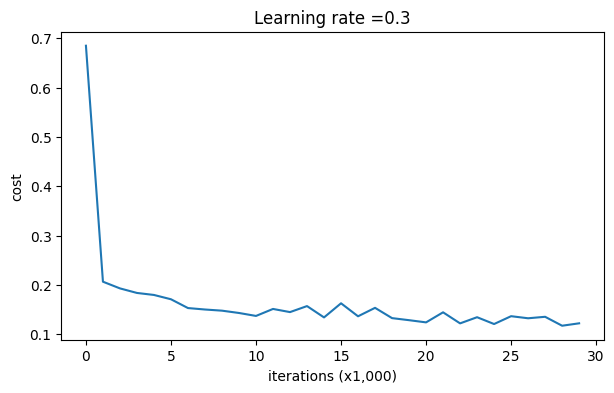

On the train set:
Accuracy: 0.909952606635071
On the test set:
Accuracy: 0.905


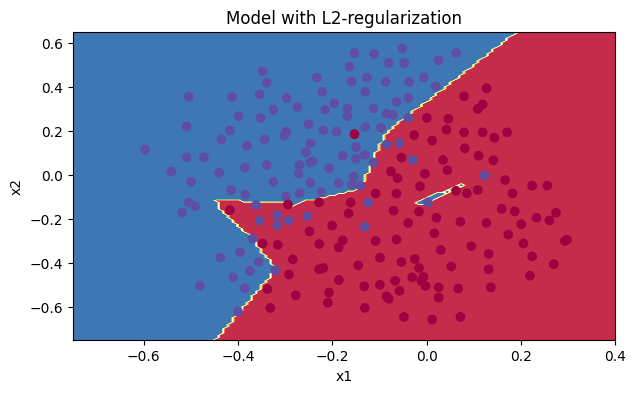

In [18]:
parameters = model(train_X, train_Y, lambd = 1e-10)
print ("On the train set:")
predictions_train = predict(train_X, train_Y, parameters)
print ("On the test set:")
predictions_test = predict(test_X, test_Y, parameters)

plt.title("Model with L2-regularization")
axes = plt.gca()
axes.set_xlim([-0.75,0.40])
axes.set_ylim([-0.75,0.65])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)

L2 cost 0: 0.04287492749893591
Cost after iteration 0: 0.771327421022128
L2 cost 10000: 0.040832168637649414
Cost after iteration 10000: 0.26876050211549785
L2 cost 20000: 0.040587344302512325
Cost after iteration 20000: 0.26863280424396635


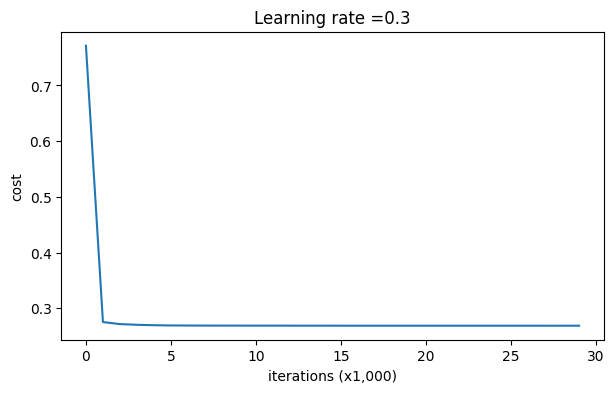

On the train set:
Accuracy: 0.9241706161137441
On the test set:
Accuracy: 0.93


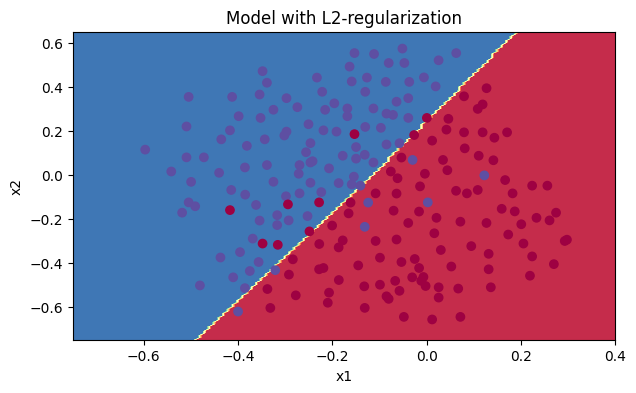

In [19]:
parameters = model(train_X, train_Y, lambd = 0.7)
print ("On the train set:")
predictions_train = predict(train_X, train_Y, parameters)
print ("On the test set:")
predictions_test = predict(test_X, test_Y, parameters)

plt.title("Model with L2-regularization")
axes = plt.gca()
axes.set_xlim([-0.75,0.40])
axes.set_ylim([-0.75,0.65])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)

In [20]:
parameters

{'W1': array([[-3.89533939e-01,  2.53534811e-01],
        [ 6.57877436e-01, -4.28149938e-01],
        [-5.61706178e-02, -2.37854789e-01],
        [-1.27637625e-06,  2.83696277e-06],
        [ 9.05945833e-03,  6.98856306e-03],
        [-2.99112706e-02, -1.27196047e-01],
        [ 1.54920118e-02,  1.19441163e-02],
        [ 5.39753895e-03,  4.16826623e-03],
        [-7.54206310e-02, -3.19379360e-01],
        [-8.55807946e-08,  1.90156992e-07],
        [ 2.13629241e-02,  1.64964484e-02],
        [ 6.88552201e-01, -4.48109921e-01],
        [-9.56612337e-02,  8.20055217e-02],
        [ 1.81936032e-02,  1.40519525e-02],
        [ 7.88582975e-01, -5.13238126e-01],
        [ 3.13471082e-02,  2.41960277e-02],
        [ 7.30729945e-14, -3.30891646e-14],
        [ 1.56319637e-01, -1.01723535e-01],
        [-4.83931857e-01,  3.14975698e-01],
        [-2.12674111e+00,  8.09985269e-01]]),
 'b1': array([[ 2.08074274e-01],
        [ 7.03684102e-01],
        [ 7.00178507e-03],
        [-7.18878322e-07]

### Dropout

![](https://miro.medium.com/max/640/1*wDGvx0z0-nEB8zQHykvwPw.webp)

![](https://miro.medium.com/max/640/1*DNewrtjKh8F2uK0TwE8C4A.webp)

![](https://miro.medium.com/max/402/1*6zbHNtrOopvWm3a_yBlbvw.webp)

In [184]:
def forward_propagation_with_dropout(X, parameters, keep_prob = 0.5):
    
    np.random.seed(1)
    
    # retrieve parameters
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    W3 = parameters["W3"]
    b3 = parameters["b3"]
    
    # LINEAR -> RELU -> LINEAR -> RELU -> LINEAR -> SIGMOID
    Z1 = np.dot(W1, X) + b1
    A1 = relu(Z1)
    ### START CODE HERE ### (approx. 4 lines)         # Steps 1-4 below correspond to the Steps 1-4 described above. 
    D1 = np.random.rand(A1.shape[0], A1.shape[1])     # Step 1: initialize matrix D1 = np.random.rand(..., ...)
    D1 = (D1 < keep_prob).astype(int)                 # Step 2: convert entries of D1 to 0 or 1 (using keep_prob as the threshold)
    A1 = A1*D1                                        # Step 3: shut down some neurons of A1
    A1 = A1/keep_prob                                 # Step 4: scale the value of neurons that haven't been shut down
    ### END CODE HERE ###
    Z2 = np.dot(W2, A1) + b2
    A2 = relu(Z2)
    ### START CODE HERE ### (approx. 4 lines)
    D2 = np.random.rand(A2.shape[0], A2.shape[1])     # Step 1: initialize matrix D2 = np.random.rand(..., ...)
    D2 = (D2 < keep_prob)                             # Step 2: convert entries of D2 to 0 or 1 (using keep_prob as the threshold)
    A2 = A2*D2                                        # Step 3: shut down some neurons of A2
    A2 = A2/keep_prob                                 # Step 4: scale the value of neurons that haven't been shut down
    ### END CODE HERE ###
    Z3 = np.dot(W3, A2) + b3
    A3 = sigmoid(Z3)
    
    cache = (Z1, D1, A1, W1, b1, Z2, D2, A2, W2, b2, Z3, A3, W3, b3)
    
    return A3, cache

In [185]:
def backward_propagation_with_dropout(X, Y, cache, keep_prob):
    """
    Implements the backward propagation of our baseline model to which we added dropout.
    
    Arguments:
    X -- input dataset, of shape (2, number of examples)
    Y -- "true" labels vector, of shape (output size, number of examples)
    cache -- cache output from forward_propagation_with_dropout()
    keep_prob - probability of keeping a neuron active during drop-out, scalar
    
    Returns:
    gradients -- A dictionary with the gradients with respect to each parameter, activation and pre-activation variables
    """
    
    m = X.shape[1]
    (Z1, D1, A1, W1, b1, Z2, D2, A2, W2, b2, Z3, A3, W3, b3) = cache
    
    dZ3 = A3 - Y
    dW3 = 1./m * np.dot(dZ3, A2.T)
    db3 = 1./m * np.sum(dZ3, axis=1, keepdims = True)
    dA2 = np.dot(W3.T, dZ3)
    ### START CODE HERE ### (≈ 2 lines of code)
    dA2 = dA2*D2            # Step 1: Apply mask D2 to shut down the same neurons as during the forward propagation
    dA2 = dA2/keep_prob     # Step 2: Scale the value of neurons that haven't been shut down
    ### END CODE HERE ###
    dZ2 = np.multiply(dA2, np.int64(A2 > 0))
    dW2 = 1./m * np.dot(dZ2, A1.T)
    db2 = 1./m * np.sum(dZ2, axis=1, keepdims = True)
    
    dA1 = np.dot(W2.T, dZ2)
    ### START CODE HERE ### (≈ 2 lines of code)
    dA1 = dA1*D1            # Step 1: Apply mask D1 to shut down the same neurons as during the forward propagation
    dA1 = dA1/keep_prob     # Step 2: Scale the value of neurons that haven't been shut down
    ### END CODE HERE ###
    dZ1 = np.multiply(dA1, np.int64(A1 > 0))
    dW1 = 1./m * np.dot(dZ1, X.T)
    db1 = 1./m * np.sum(dZ1, axis=1, keepdims = True)
    
    gradients = {"dZ3": dZ3, "dW3": dW3, "db3": db3,"dA2": dA2,
                 "dZ2": dZ2, "dW2": dW2, "db2": db2, "dA1": dA1, 
                 "dZ1": dZ1, "dW1": dW1, "db1": db1}
    
    return gradients

Cost after iteration 0: 0.6910175809916411
Cost after iteration 10000: 0.03439047899008448
Cost after iteration 20000: 0.17791710966362415


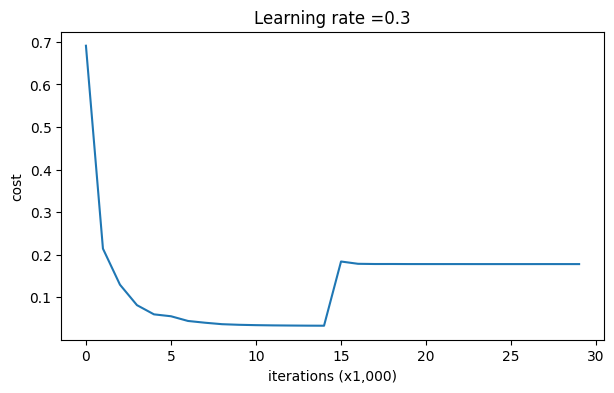

On the train set:
Accuracy: 0.8909952606635071
On the test set:
Accuracy: 0.88


In [188]:
parameters = model(train_X, train_Y, keep_prob = 0.86, learning_rate = 0.3)

print ("On the train set:")
predictions_train = predict(train_X, train_Y, parameters)
print ("On the test set:")
predictions_test = predict(test_X, test_Y, parameters)

In [189]:
np.mean(parameters['W1'])

-0.18713280903115304

In [183]:
np.mean(parameters['W1'])

0.13770924286263395

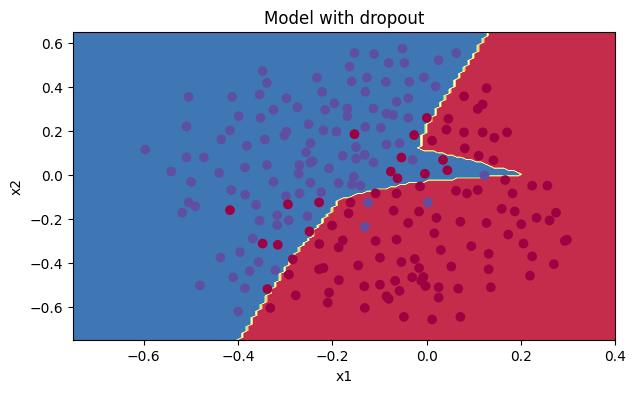

In [181]:
plt.title("Model with dropout")
axes = plt.gca()
axes.set_xlim([-0.75,0.40])
axes.set_ylim([-0.75,0.65])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)

Cost after iteration 0: 0.6885024680071804
Cost after iteration 10000: 0.1540723979146127
Cost after iteration 20000: 0.13498419559240826


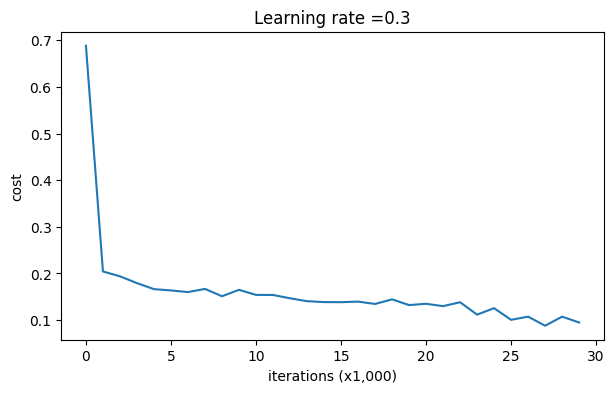

On the train set:
Accuracy: 0.9052132701421801
On the test set:
Accuracy: 0.905


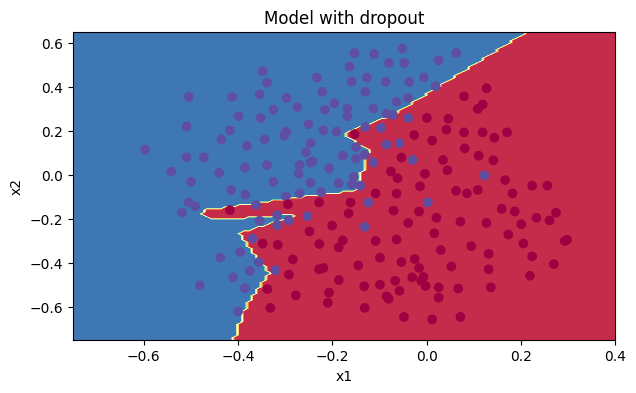

In [25]:
parameters = model(train_X, train_Y, keep_prob = 0.99, learning_rate = 0.3)

print ("On the train set:")
predictions_train = predict(train_X, train_Y, parameters)
print ("On the test set:")
predictions_test = predict(test_X, test_Y, parameters)

plt.title("Model with dropout")
axes = plt.gca()
axes.set_xlim([-0.75,0.40])
axes.set_ylim([-0.75,0.65])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)

Cost after iteration 0: 0.6931471805599453
Cost after iteration 10000: 0.6931359498627058
Cost after iteration 20000: 0.6931359498627058


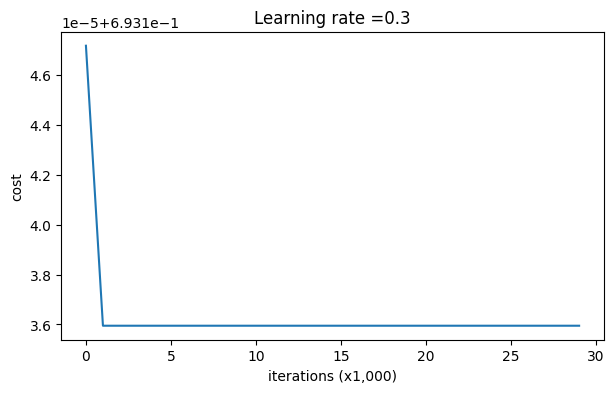

On the train set:
Accuracy: 0.6018957345971564
On the test set:
Accuracy: 0.65


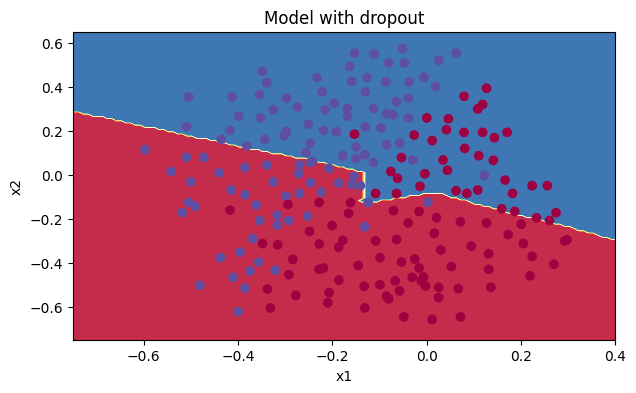

In [26]:
parameters = model(train_X, train_Y, keep_prob = 0.01, learning_rate = 0.3)

print ("On the train set:")
predictions_train = predict(train_X, train_Y, parameters)
print ("On the test set:")
predictions_test = predict(test_X, test_Y, parameters)

plt.title("Model with dropout")
axes = plt.gca()
axes.set_xlim([-0.75,0.40])
axes.set_ylim([-0.75,0.65])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)

In [27]:
parameters

{'W1': array([[ 0.3524015 , -0.51401618],
        [-0.79535137, -0.40628909],
        [ 0.24950659,  0.26912795],
        [-0.74262074, -1.20475796],
        [ 0.32237739,  1.15007561],
        [ 0.00332336,  0.93403484],
        [ 0.04131717,  1.11588177],
        [-0.91494318,  0.19747255],
        [-0.99247562,  0.14739739],
        [-0.79080382,  0.12399177],
        [ 0.40431174, -0.4794469 ],
        [-0.13573807, -0.44570123],
        [-0.58844767, -0.21469547],
        [-0.34922056, -1.09758304],
        [-0.86114198,  0.91637965],
        [-0.3909383 , -0.88459713],
        [ 0.12755732,  0.0184609 ],
        [-0.79650823, -0.99903986],
        [-0.73317785,  0.75203362],
        [ 0.82134136,  0.26045103]]),
 'b1': array([[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],


Cost after iteration 0: 0.6993286490144661
Cost after iteration 10000: 0.3285511042687986
Cost after iteration 20000: 0.32844823778965043


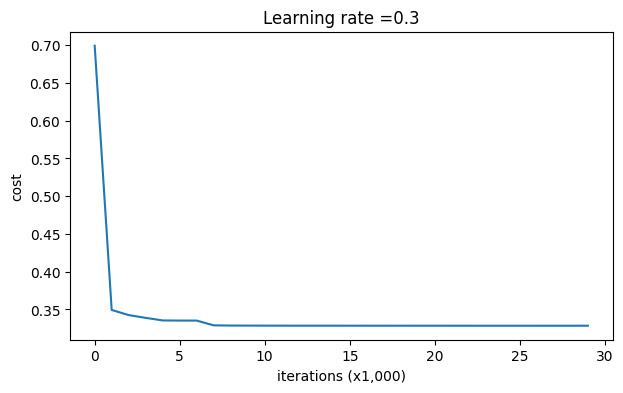

On the train set:
Accuracy: 0.9004739336492891
On the test set:
Accuracy: 0.905


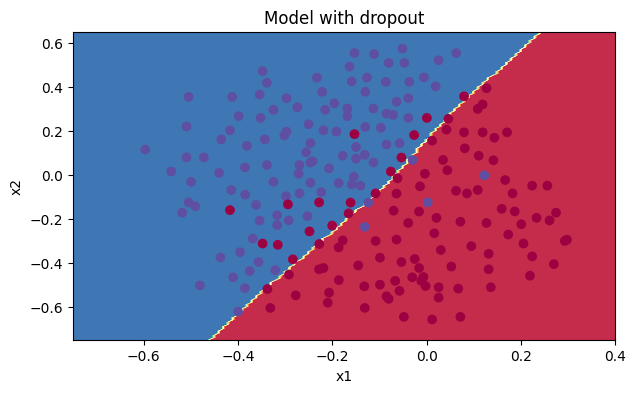

In [28]:
parameters = model(train_X, train_Y, keep_prob = 0.4, learning_rate = 0.3)

print ("On the train set:")
predictions_train = predict(train_X, train_Y, parameters)
print ("On the test set:")
predictions_test = predict(test_X, test_Y, parameters)

plt.title("Model with dropout")
axes = plt.gca()
axes.set_xlim([-0.75,0.40])
axes.set_ylim([-0.75,0.65])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)

Cost after iteration 0: 0.6919441123489064
Cost after iteration 10000: 0.03347341726449166
Cost after iteration 20000: 0.03204363801418071


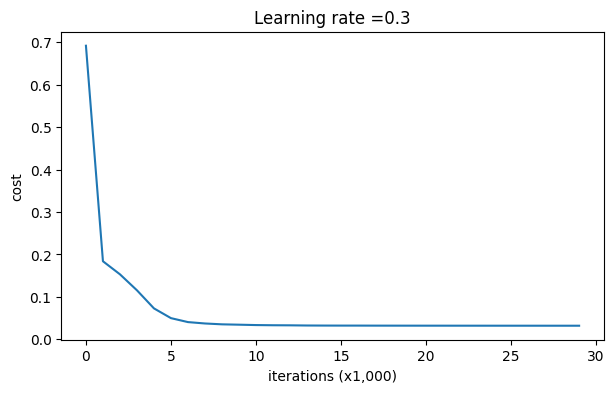

On the train set:
Accuracy: 0.8957345971563981
On the test set:
Accuracy: 0.9


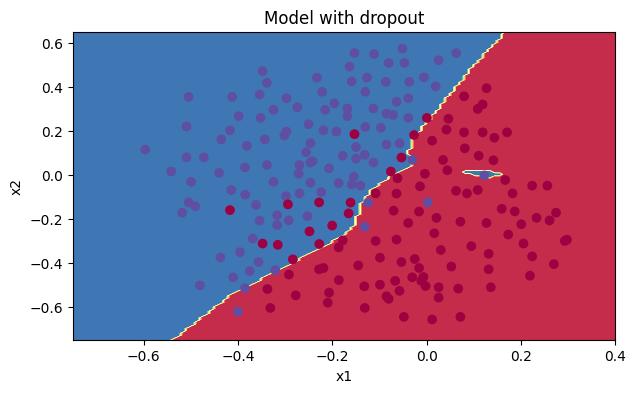

In [29]:
parameters = model(train_X, train_Y, keep_prob = 0.8, learning_rate = 0.3)

print ("On the train set:")
predictions_train = predict(train_X, train_Y, parameters)
print ("On the test set:")
predictions_test = predict(test_X, test_Y, parameters)

plt.title("Model with dropout")
axes = plt.gca()
axes.set_xlim([-0.75,0.40])
axes.set_ylim([-0.75,0.65])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)

Cost after iteration 0: 0.688497869191775
Cost after iteration 10000: 0.1648547202983002
Cost after iteration 20000: 0.1647046568689691


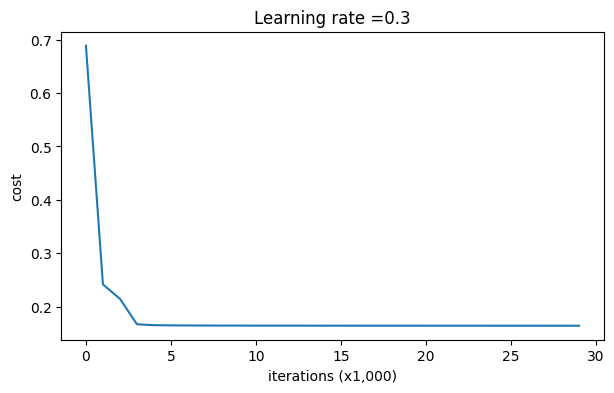

In [30]:
parameters = model(train_X, train_Y, keep_prob = 0.6, learning_rate = 0.3)

In [176]:
print ("On the train set:")
predictions_train = predict(train_X, train_Y, parameters, use_dropuout=True, keep_prob=0.999)
print ("On the test set:")
predictions_test = predict(test_X, test_Y, parameters, use_dropuout=True, keep_prob=0.999)

On the train set:
Accuracy: 0.8862559241706162
On the test set:
Accuracy: 0.905


In [148]:
predictions_train

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [147]:
np.mean(train_Y)

0.5023696682464455

In [139]:
np.mean(test_Y)

0.435